# KNN

In [30]:
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import euclidean
from scipy import stats
from matplotlib import pyplot as plt

## Roadmap
1. Calculate all distancies between known and unknown points
2. Predict class of unknown point by the k nearest neighbours



In [31]:
def calc_all_distancies(data_x, unknown):
    '''
        Function calculates distancies between each pairs of known and unknown points
    '''
    num_pred = unknown.shape[0]
    num_data = data_x.shape[0]
    dists = np.zeros((num_pred, num_data))
    
    for i in range(num_pred):
        for j in range(num_data):
            dists[i, j] = euclidean(unknown[i], data_x[j])
    
    return dists        

In [32]:
def predict(dists, data_y, k):
    '''
        Function predicts the class of the unknown point by the k nearest neighbours
    '''
    num_pred = dists.shape[0]
    y_pred = np.zeros(num_pred)
    
    for i in range(num_pred):
        dst = dists[i]
        ind_k = np.argsort(dst)[:k]
        y_nearest = data_y[ind_k]
        y_pred[i] = stats.mode(y_nearest, axis = None).mode
        
    return y_pred

In [33]:
def accuracy(predicted,real):
    '''
        Calculates accuracy percentage
    '''
    l = len(real)
    s = sum(predicted == real)
    
    return s / l * 100

In [34]:
def compare_k(data_x, data_y, test_x, test_y, kmin=1, kmax=50, kstep=4):
    '''
        Main comparing function
    '''
    k = list(range(kmin, kmax, kstep))
    steps = len(k)
    features = np.zeros((steps,3))
    
    print('Evaluating distancies started')
    
    t0 = time.time()
    distancies = calc_all_distancies(data_x,test_x)
    miss = []
    t = time.time()
    s1 = data_x.shape[0]
    s2 = test_x.shape[0]
    
    print('Distancies completed in %d seconds for %dx%d' %(t-t0,s1,s2))
    
    for j in range(steps):
        t0 = time.time()
        yk = predict(distancies,data_y,k[j])
        t = time.time() - t0
        features[j][0] = k[j]
        features[j][1] = accuracy(yk,test_y)
        features[j][2] = t
        cond = yk!=test_y
        miss.append({
            'k':k[j],
            'acc':features[j][1],
            'x':test_x[cond]}
        )
        
        print('k={0}, accuracy = {1}%, time = {2} sec'.format(k[j],features[j][1],features[j][2]))
        
    return features, miss

In [43]:
num_observations = 300
x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([-2, 3], [[2, .75], [.75, 2]], num_observations)


X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
               np.ones(num_observations)))



## Select some part of data to be tested

In [44]:
X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
               np.ones(num_observations)))

ratio = 0.67
l = len(X)
n_trn = int(ratio * l)
ind = np.random.permutation(l)
X = X[ind]
Y = Y[ind]

x_trn = X[:n_trn]
y_trn = Y[:n_trn]
x_tst = X[n_trn:]
y_tst = Y[n_trn:]
print(x_trn.shape, y_trn.shape, x_tst.shape, y_tst.shape)

(402, 2) (402,) (198, 2) (198,)


## Calculate distancies & compare result for different k

In [45]:
res, ms = compare_k(x_trn, y_trn, x_tst, y_tst, 1, 201, 20)

Evaluating distancies started
Distancies completed in 0 seconds for 402x198
k=1, accuracy = 98.48484848484848%, time = 0.013508796691894531 sec
k=21, accuracy = 99.4949494949495%, time = 0.014022350311279297 sec
k=41, accuracy = 98.98989898989899%, time = 0.014526605606079102 sec
k=61, accuracy = 98.98989898989899%, time = 0.014007568359375 sec
k=81, accuracy = 98.98989898989899%, time = 0.01599907875061035 sec
k=101, accuracy = 98.48484848484848%, time = 0.01602911949157715 sec
k=121, accuracy = 97.97979797979798%, time = 0.017003774642944336 sec
k=141, accuracy = 97.47474747474747%, time = 0.01602911949157715 sec
k=161, accuracy = 95.95959595959596%, time = 0.016515254974365234 sec
k=181, accuracy = 95.45454545454545%, time = 0.017012357711791992 sec


## Visualisation

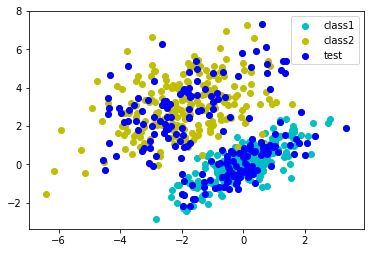

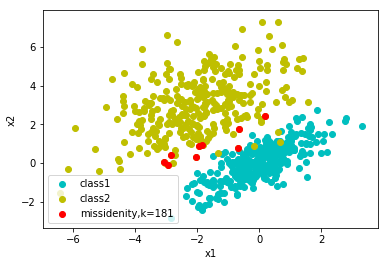

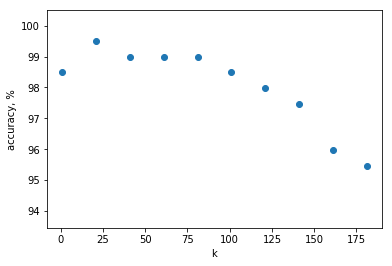

In [46]:
# initial data
fig = plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c',label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y',label='class2')
# randomly selected data
plt.scatter(x_tst[:,0],x_tst[:,1],color='b',label='test')
plt.legend(loc='best')


# missidentifies for k = value
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c', label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y', label='class2')
plt.scatter(ms[-1]['x'][:,0],ms[-1]['x'][:,1],color='r',label='missidenity,k=%d'%ms[-1]['k'])
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.figure()

# accuracy plot
k = plt.scatter(res[:, 0], res[:, 1])
plt.ylim(min(res[:, 1]) - 2, max(res[:, 1])+1, 4)
plt.xlabel('k')
plt.ylabel('accuracy, %')
plt.show()